In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint


import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
import json, os, uuid

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/BarclaysReviews/data/final_merged_reviews_cleaned.csv")


Mounted at /content/drive


In [11]:
df = df[df['cleaned_data'].notnull()]

In [2]:
MOUNT_DIR = '/content/drive/MyDrive/BarclaysReviews/'
DATA_DIR = '/content/drive/MyDrive/BarclaysReviews/data/'
MODEL_DIR = '/content/drive/MyDrive/BarclaysReviews/model/'

In [3]:
ratingColName = 'customer_sentiment'
df[ratingColName] = 'POSITIVE'
for i in df.index:
    if df['rating'][i] > 3:
      df[ratingColName][i] = 'POSITIVE'
    else:
      df[ratingColName][i] = 'NEGATIVE'
#df = df[df['review_description'].notnull() & df[ratingColName].str.contains('NEGATIVE')]

<ipython-input-3-7c1a3ace555d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ratingColName][i] = 'NEGATIVE'
<ipython-input-3-7c1a3ace555d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ratingColName][i] = 'POSITIVE'


In [4]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [9]:
import wordcloud
import matplotlib.pyplot as plt
import pandas as pd #Vivek Jha May 1
%matplotlib inline
import matplotlib.pylab as plt #Vivek Jha May 1
from PIL import Image
import numpy as np #Vivek Jha May 1
from imageio import imread
from wordcloud import WordCloud,ImageColorGenerator

def generateWordCloud(df,columns ={},textcol = "cleaned_data"):
  print(columns)
  if bool(columns):
    # print("columns")
    for key in columns:
      # print(df.shape)
      df = df[df[key].str.contains(columns[key])]
  print(df.shape)
  text = " ".join(str(title) for title in df[textcol] if title)
  df.reset_index(drop=True, inplace=True)
  # print(text2)
  # Creating word_cloud with text as argument in .generate() method

  #word_cloud2 = WordCloud(collocations = False, background_color = 'white',max_font_size=100, max_words=100).generate(text2)
  mask= np.array(Image.open(DATA_DIR+'barclays_logo.png')) 
  # Transform mask into a new one that will work with the function:
  transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

  for i in range(len(mask)):
      transformed_mask[i] = list(map(transform_format, mask[i]))

  wc = WordCloud(background_color="white", max_words=100, mask=transformed_mask,
                contour_width=1)

  # Generate a wordcloud
  wc.generate(text)

  # store to file
  #plt.savefig("cloud.png", format="png")

  # show
  # plt.figure( figsize=[20,10])
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  #back_color = imread(Image.open(DATA_DIR+'barclays_logo.png'))
  

  

  # #wordcloud = WordCloud(collocations = False,max_font_size=100,max_words=100,width=1600,height=800,mask=mask,background_color="white").generate(text2) #Vivek Jha May 1
  # # Display the generated Word Cloud
  # #plt.figure(figsize=(20,10),facecolor="k") #Vivek Jha May 1
  # plt.imshow(word_cloud2, interpolation='bilinear')
  # # plt.imshow(wordcloud,interpolation="bilinear") #Vivek Jha May 1
  # plt.axis("off")
  # plt.tight_layout(pad=8)

  # show
  #fig, ax = plt.subplots(figsize=(10,10), dpi=60)
  #ax.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")



{}
(32671, 20)


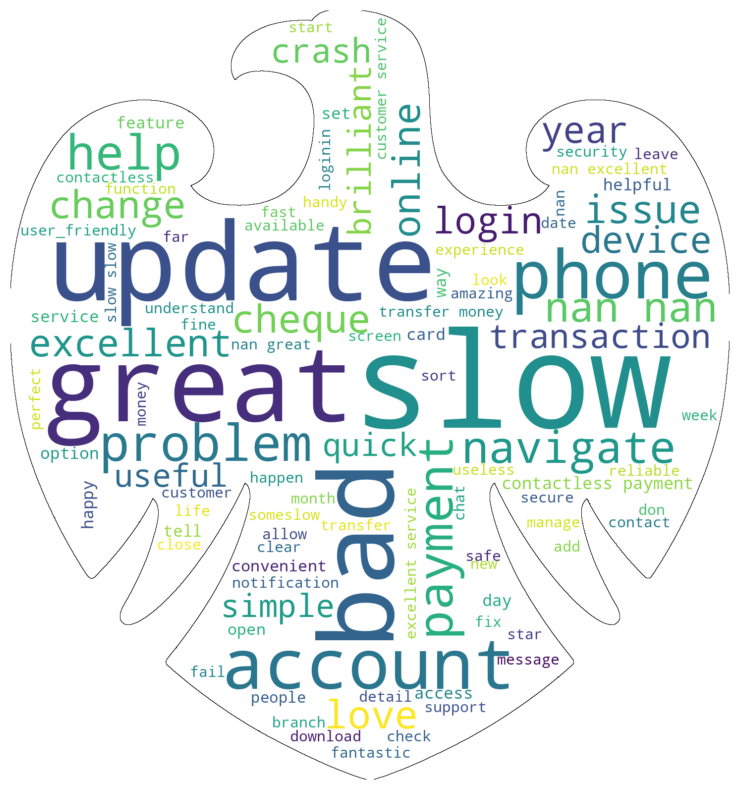

In [ ]:
generateWordCloud(df)

{'customer_sentiment': 'NEGATIVE'}
(6267, 19)


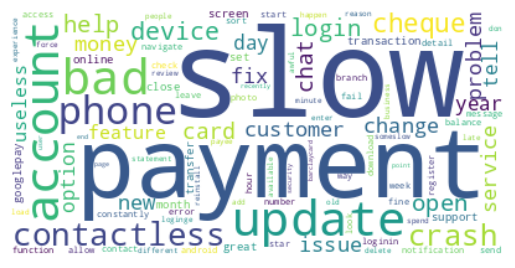

In [ ]:
generateWordCloud(df,columns ={"customer_sentiment":"NEGATIVE"})

{'customer_sentiment': 'POSITIVE'}
(20337, 20)


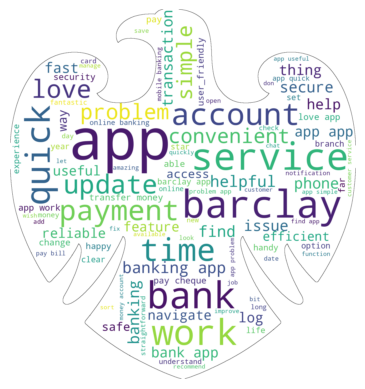

In [12]:
generateWordCloud(df,columns ={"customer_sentiment":"POSITIVE"})
# great, slow, nan, especially, people, someslow, etc, "banking", "banking app","app", "bank", "don"
# {"excellent":"great,"brilliant":"great", "perfect":"great", "love": "great", "like": "great"}

{'source': 'Google Play'}
(30671, 19)


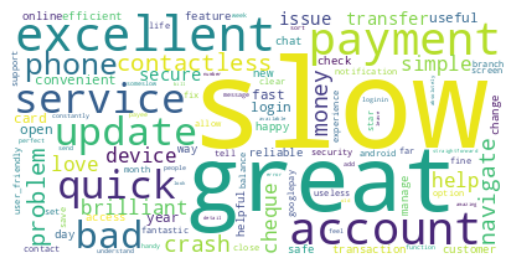

In [ ]:
generateWordCloud(df,columns ={"source":"Google Play"})

{'source': 'Google Play', 'customer_sentiment': 'POSITIVE'}
(25086, 19)


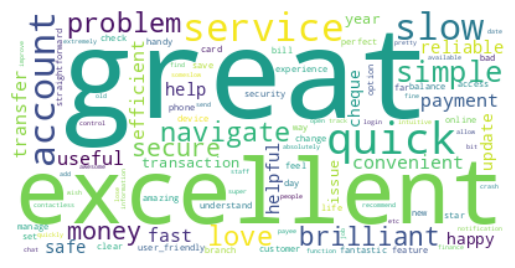

In [ ]:
generateWordCloud(df,columns ={"source":"Google Play","customer_sentiment":"POSITIVE"})

{'source': 'Google Play', 'customer_sentiment': 'NEGATIVE'}
(5585, 19)


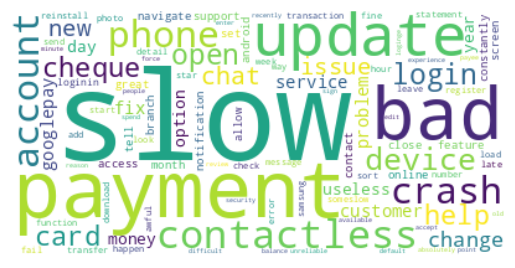

In [ ]:
generateWordCloud(df,columns ={"source":"Google Play","customer_sentiment":"NEGATIVE"})

{'source': 'App Store'}
(2000, 19)


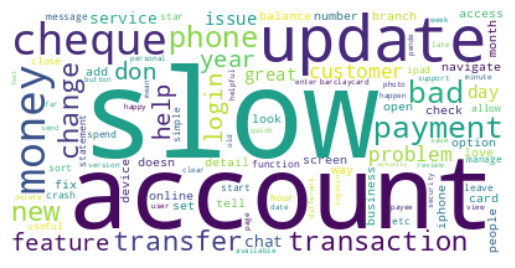

In [ ]:
generateWordCloud(df,columns ={"source":"App Store"})

{'source': 'App Store', 'customer_sentiment': 'POSITIVE'}
(1318, 19)


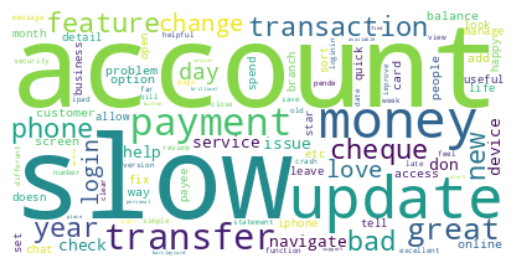

In [ ]:
generateWordCloud(df,columns ={"source":"App Store","customer_sentiment":"POSITIVE"})

{'source': 'App Store', 'customer_sentiment': 'NEGATIVE'}
(682, 19)


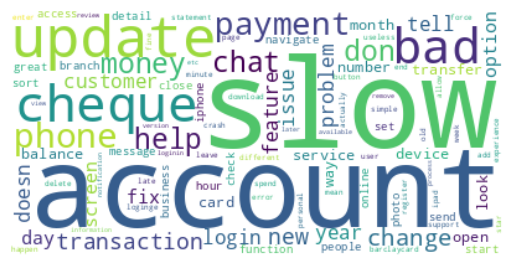

In [ ]:
generateWordCloud(df,columns ={"source":"App Store","customer_sentiment":"NEGATIVE"})